## Some code playing with the Echonest API python wrapper

[Pythondocs](http://echonest.github.io/pyechonest/)  
[Github](https://github.com/echonest/pyechonest)  
[API Overview](http://developer.echonest.com/docs/v4)  
[Things you can do with the API](http://developer.echonest.com/tutorial-overview.html)  
[Remix part of the API](http://echonest.github.io/remix/tutorial.html)  
[More examples with Remix](http://echonest.github.io/remix/examples.html)  
[Code for examples](https://github.com/echonest/remix-examples)  

Resources for the Spotify web API:  
[Python wrapper](https://github.com/plamere/spotipy)  
[Meteor.js wrapper with links to Node.js and general client js wrappers](https://github.com/xinranxiao/meteor-spotify-web-api/)  


In [69]:
from pyechonest import config, artist, song
import pandas as pd
config.ECHO_NEST_API_KEY = 'XXXXXXXX' #retrieved from https://developer.echonest.com/account/profile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Query a single song, get its audio features and make a dataframe

In [4]:
songs = song.search(title='Elastic Heart',artist='Sia',buckets='id:spotify',limit=True,results=1)
elasticHeart = songs[0]

In [5]:
elasticHeartFeatures = pd.DataFrame.from_dict(elasticHeart.audio_summary,orient='index')

In [10]:
pd.DataFrame.from_dict([elasticHeart.audio_summary])

,acousticness,analysis_url,audio_md5,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.021916,http://echonest-analysis.s3.amazonaws.com/TR/j...,,0.670395,224.45333,0.743102,0.000014,9,0.180429,-6.031,1,0.03682,130.044,4,0.512652


### Grab and compare the hottest tracks, available in Spotify, for 2 artists on a number of audio features

In [50]:
floHottest = song.search(artist = 'Flo Rida' ,sort = 'song_hotttnesss-desc', buckets = 'id:spotify', limit = True, results = 20)
fsongFeatures = []
for song in floHottest:
    fsongFeatures.append(song.audio_summary)

In [53]:
S= pd.DataFrame.from_dict(songFeatures)
S.index = [song.title for song in siaHottest]
S['hotness'] = [song.song_hotttnesss for song in siaHottest]

In [64]:
F= pd.DataFrame.from_dict(fsongFeatures)
F.index = [song.title for song in floHottest]
F['hotness'] = [song.song_hotttnesss for song in floHottest]

In [65]:
u,idx = np.unique(S.index,return_index=True)
S = S.ix[idx,:]
u,idx = np.unique(F.index,return_index=True)
F = F.ix[idx,:]

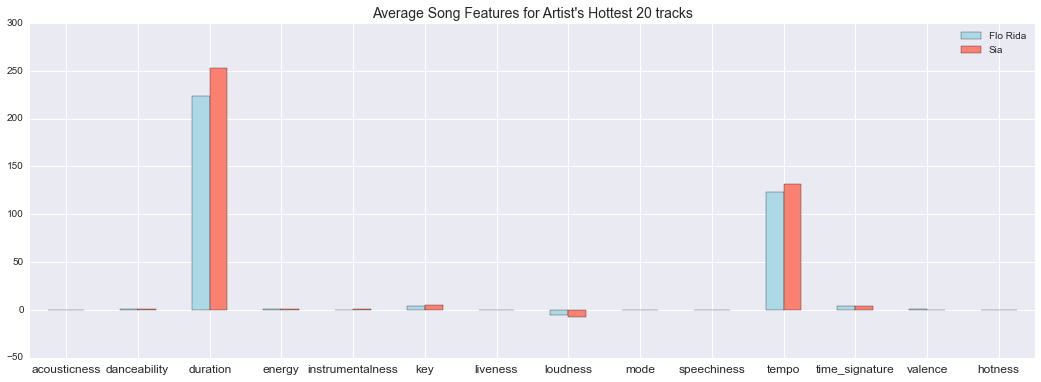

In [133]:
ax = pd.DataFrame({'Flo Rida':F.mean(), 'Sia': S.mean()}).plot(kind='bar',figsize=(18,6),rot=0, color = ['lightblue','salmon']);
ax.set_title("Average Song Features for Artist's Hottest 20 tracks",fontsize=14);
ax.tick_params(axis='x', labelsize=12)

In [145]:
Elastic_Heart = siaHottest[5].get_tracks('spotify')

In [152]:
Elastic_Heart[1]


{u'catalog': u'spotify',
 u'foreign_id': u'spotify:track:3yFdQkEQNzDwpPB1iIFtaM',
 u'foreign_release_id': u'spotify:album:2uLFriAEtIBfZvjTb1nru3',
 u'id': u'TRVJDIL14EA1351E7F'}

In [157]:
%%html
<iframe src="https://embed.spotify.com/?uri=spotify:track:3yFdQkEQNzDwpPB1iIFtaM" width="300" height="380" frameborder="0" allowtransparency="true"></iframe>